In [118]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense

In [120]:
df = pd.read_excel("/content/fertilizer.xlsx")

In [121]:
df.head()

,Area_code,Area,Item_code,Item,Element_code,Element,Year_code,Year,Unit,Value,Flag
0,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2006,2006,tonnes,0.01,Qm
1,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2007,2007,tonnes,32.88,Qm
2,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2008,2008,tonnes,62.19,Qm
3,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2009,2009,tonnes,119.93,Qm
4,1,Armenia,4007,"Ammonia, anhydrous",5610,Import Quantity,2010,2010,tonnes,94.17,Qm


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146550 entries, 0 to 146549
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area_code     146550 non-null  int64  
 1   Area          146550 non-null  object 
 2   Item_code     146550 non-null  int64  
 3   Item          146550 non-null  object 
 4   Element_code  146550 non-null  int64  
 5   Element       146550 non-null  object 
 6   Year_code     146550 non-null  int64  
 7   Year          146550 non-null  int64  
 8   Unit          146550 non-null  object 
 9   Value         146550 non-null  float64
 10  Flag          146550 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.3+ MB


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area_code,146550.0,129.388878,73.241525,1.0,67.0000,121.000,198.000,276.00
Item_code,146550.0,4014.247472,9.006368,4001.0,4006.0000,4014.000,4022.000,4030.00
Element_code,146550.0,5665.826905,212.072730,5157.0,5610.0000,5622.000,5910.000,5922.00
Year_code,146550.0,2009.742143,4.543515,2002.0,2006.0000,2010.000,2014.000,2017.00
Year,146550.0,2009.742143,4.543515,2002.0,2006.0000,2010.000,2014.000,2017.00
Value,146550.0,98259.402706,689518.845901,-1043.0,50.8825,1087.745,16683.455,49046666.67


In [124]:
df.columns

Index(['Area_code', 'Area', 'Item_code', 'Item', 'Element_code', 'Element',
       'Year_code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')

In [125]:
df.drop(['Area_code','Item_code','Element_code','Year_code',"Flag"],axis =1,inplace =True)

In [126]:
df1=pd.get_dummies(df,columns=['Area','Element','Item','Unit'],drop_first=True)
print(df1.shape)

(146550, 175)


In [127]:
df1.columns

Index(['Year', 'Value', 'Area_Albania', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria',
       'Area_Azerbaijan',
       ...
       'Item_Phosphate rock',
       'Item_Potassium chloride (muriate of potash) (MOP)',
       'Item_Potassium nitrate',
       'Item_Potassium sulphate (sulphate of potash) (SOP)',
       'Item_Sodium nitrate', 'Item_Superphosphates above 35%',
       'Item_Superphosphates, other', 'Item_Urea',
       'Item_Urea and ammonium nitrate solutions (UAN)', 'Unit_tonnes'],
      dtype='object', length=175)

In [128]:
df1.head(1)

,Year,Value,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,...,Item_Phosphate rock,Item_Potassium chloride (muriate of potash) (MOP),Item_Potassium nitrate,Item_Potassium sulphate (sulphate of potash) (SOP),Item_Sodium nitrate,Item_Superphosphates above 35%,"Item_Superphosphates, other",Item_Urea,Item_Urea and ammonium nitrate solutions (UAN),Unit_tonnes
0,2006,0.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146550 entries, 0 to 146549
Columns: 175 entries, Year to Unit_tonnes
dtypes: float64(1), int64(1), uint8(173)
memory usage: 26.4 MB


In [130]:
Y= df1['Value']

In [131]:
df1.drop("Value",inplace=True,axis=1)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2=pd.DataFrame(data=scaler.fit_transform(df1),columns=df1.columns)

In [135]:
df2.describe()

,Year,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,Area_Bahrain,...,Item_Phosphate rock,Item_Potassium chloride (muriate of potash) (MOP),Item_Potassium nitrate,Item_Potassium sulphate (sulphate of potash) (SOP),Item_Sodium nitrate,Item_Superphosphates above 35%,"Item_Superphosphates, other",Item_Urea,Item_Urea and ammonium nitrate solutions (UAN),Unit_tonnes
count,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,...,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000,146550.000000
mean,0.516143,0.005827,0.006633,0.005329,0.009608,0.003978,0.009969,0.008461,0.005609,0.004817,...,0.041494,0.054159,0.046196,0.047281,0.036035,0.043896,0.006844,0.064074,0.028243,0.566346
std,0.302901,0.076115,0.081170,0.072807,0.097547,0.062947,0.099348,0.091596,0.074683,0.069241,...,0.199431,0.226332,0.209910,0.212240,0.186379,0.204865,0.082446,0.244885,0.165667,0.495580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
X=df2

In [140]:
X.shape,Y.shape
#print(df.describe())

((146550, 174), (146550,))

In [142]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=7)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(117240, 174) (29310, 174) (117240,) (29310,)


In [143]:
n_features = X_train.shape[1]  ## n_features =15
n_features

174

In [144]:
# define model with 2 hidden layer
model1 = Sequential()
model1.add(Dense(200, activation='relu', input_shape=(n_features,))) ##50,128
model1.add(Dense(128, activation='relu'))
model1.add(Dense(100, activation='relu')) #100,64 ,
model1.add(Dense(1, activation='linear')) #

In [145]:
# compile the model
model1.compile(optimizer='adam', loss=['mean_squared_error','mean_absolute_error'], metrics=['mae'])

In [146]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               35000     
                                                                 
 dense_13 (Dense)            (None, 128)               25728     
                                                                 
 dense_14 (Dense)            (None, 100)               12900     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 73,729
Trainable params: 73,729
Non-trainable params: 0
_________________________________________________________________


In [147]:
history=model1.fit(X_train,Y_train,validation_split=0.2,epochs=500,batch_size=100)

Epoch 1/500
938/938 [==============================] - 6s 6ms/step - loss: 465118593024.0000 - mae: 132542.6406 - val_loss: 408066719744.0000 - val_mae: 133776.5000
Epoch 2/500
938/938 [==============================] - 5s 5ms/step - loss: 406869344256.0000 - mae: 121365.8984 - val_loss: 369392189440.0000 - val_mae: 112492.5234
Epoch 3/500
938/938 [==============================] - 5s 5ms/step - loss: 373614313472.0000 - mae: 112124.0156 - val_loss: 348656467968.0000 - val_mae: 114326.8984
Epoch 4/500
938/938 [==============================] - 5s 5ms/step - loss: 352800309248.0000 - mae: 110928.5547 - val_loss: 336630677504.0000 - val_mae: 110619.0234
Epoch 5/500
938/938 [==============================] - 5s 5ms/step - loss: 338357092352.0000 - mae: 108298.2969 - val_loss: 330488905728.0000 - val_mae: 113336.7812
Epoch 6/500
938/938 [==============================] - 5s 5ms/step - loss: 329440428032.0000 - mae: 107252.6484 - val_loss: 325572067328.0000 - val_mae: 106626.2344
Epoch 7/50

In [148]:
#predict on test data
predictions=model1.predict(X_test[:5])
print("Predicted values are: ",predictions)
print("Real value are: ",Y_test[:5])

Predicted values are:  [[ 8719.481 ]
 [14529.089 ]
 [ 1310.1111]
 [ 5666.002 ]
 [ 1310.1108]]
Real value are:  145666        0.00
81706     82216.14
94045       114.71
123093      109.00
141486      125.77
Name: Value, dtype: float64


In [149]:
y_pred_nn = model1.predict(X_test)
y_pred_nn

array([[ 8719.481 ],
       [14529.089 ],
       [ 1310.1111],
       ...,
       [ 5066.6685],
       [-1718.7476],
       [ 1310.1111]], dtype=float32)

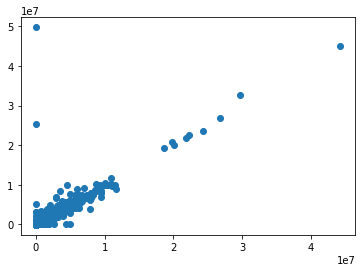

In [150]:
plt.scatter(Y_test,y_pred_nn)

In [151]:
def eval_fun(Y_test,Y_pred):
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
  r2 = r2_score(Y_test,Y_pred)
  mse = mean_squared_error(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  return r2,mse,mae
#r2,mse,mae for NN model
r2,mse,mae = eval_fun(Y_test,y_pred_nn)
print("r2 score: ",r2,"mean_squared_error: ",mse,"mean_absolute_error: ",mae)

r2 score:  0.7226724531507274 mean_squared_error:  127240731494.27417 mean_absolute_error:  35600.356929500296


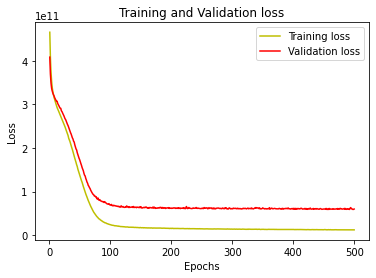

In [152]:
##plot the training and validation loss at each epochs
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs=range(1,len(loss) + 1) #range(1,35)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

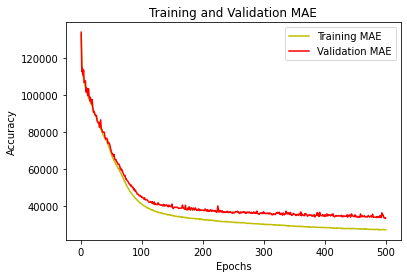

In [153]:

from matplotlib import pyplot as plt
mae = history.history['mae']
val_mae= history.history['val_mae']
epochs=range(1,len(loss) + 1) #range(1,11)
plt.plot(epochs,mae,'y',label='Training MAE')
plt.plot(epochs,val_mae,'r',label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [154]:
loss,acc = model1.evaluate(X_test,Y_test,verbose=0)
print("Accuracy: %.4f" %acc)
print("loss: %.4f" %loss)

Accuracy: 35600.3555
loss: 127240904704.0000


In [155]:
def rmse(Y_test,Y_pred):
  from sklearn.metrics import mean_squared_error
  import numpy as np
  mse = mean_squared_error(Y_test,Y_pred)
  rmse=np.sqrt(mse)
  return rmse
rmse(Y_test,y_pred_nn)

356708.1881514274

In [156]:
import pickle 
pickle.dump(model1,open("Model1.pkl",'wb'))
#loading the save model
Model = pickle.load(open("Model1.pkl",'rb'))


In [159]:
#from kerastuner.tuners import RandomSearch

In [160]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 15.3 MB/s 
     |████████████████████████████████| 1.6 MB 46.7 MB/s 


In [161]:
#layer,neuron,learning rate
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 50)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
    return model

In [162]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,directory='project',project_name='Value')

NameError: ignored

In [ ]:
tuner.search_space_summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
tuner.search(X_train, Y_train,epochs=5,validation_data=(X_test, Y_test))

In [ ]:
tuner.results_summary()

# Run Flask in google colab


In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
##running the flask app
app=Flask(__name__)
##when the app is run that time ngrok should be already start
run_with_ngrok(app)
@app.route('/')
def index():
  return "<h1>Trail of Flask on google colab!</h1>"
@app.route("/get_details")
def get_details():
  return "<h1>This is the get details page!</h1>"
@app.route("/test")
def test_page():
  return "<h1>This is Test page!</h1>"

app.run()
